<a href="https://colab.research.google.com/github/melbinmv/OpenCV/blob/master/Train_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = "/content/gdrive/My Drive/Colab Notebooks/Face_Recognition/Datasets/Train/*"
valid_path = "/content/gdrive/My Drive/Colab Notebooks/Face_Recognition/Datasets/Test/*"

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob("/content/gdrive/My Drive/Colab Notebooks/Face_Recognition/Datasets/Train/*")

In [ ]:
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/Colab Notebooks/Face_Recognition/Datasets/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/Colab Notebooks/Face_Recognition/Datasets/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [ ]:
print(len(training_set))

7


In [ ]:
print(len(test_set))


7


In [ ]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs= 5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
7/7 [==============================] - 239s 37s/step - loss: 0.7974 - accuracy: 0.7273 - val_loss: 0.0842 - val_accuracy: 0.9727
Epoch 2/5
7/7 [==============================] - 257s 40s/step - loss: 0.0371 - accuracy: 0.9773 - val_loss: 6.1243e-04 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 256s 40s/step - loss: 7.2133e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 224s 35s/step - loss: 8.1891e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 257s 40s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000


In [ ]:
from keras.models import load_model

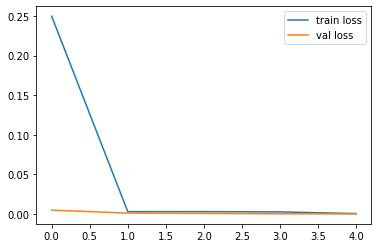

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

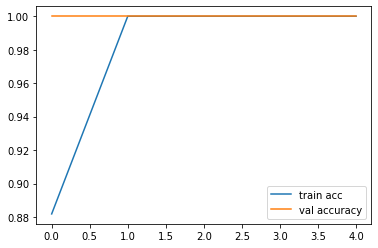

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
model.save('//content/gdrive/My Drive/Colab Notebooks/Face_Recognition/facefeatures_new_model.h5')

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


NameError: ignored